# STEP 1 — BUSINESS UNDERSTANDING

### Business Objectives

1. Standardize and clean all raw datasets

2. Remove errors, duplicates, and inconsistent values

3. Integrate customers, brokers, properties, and deals into a master dataset

4. Predict final property price using regression

5. Identify amenity patterns using association rule mining

6. Predict deal status using classification models

### Key KPIs

#### 1.Price per square foot
#### 2.Broker success rate
#### 3.Customer income segments
#### 4.Deal closure probability
#### 5.Amenity co-occurrence patterns

# STEP 2 — Data Discovery & Ingestion (Excel Load)

**Load all sheets**

**Display metadata**

**Store in dataframes{}**

In [ ]:
import pandas as pd
import os

excel_file_name = 'data/real_estate_curation_project.xlsx'

dataframes = {}

print("---  Data Discovery and Ingestion (from Excel) ---")

if not os.path.exists(excel_file_name):
    print(f"\n[Error] File not found: {excel_file_name}")
    print("Please make sure this file is in the same directory as your notebook.")
    
else:
    try:
        dataframes = pd.read_excel(excel_file_name, sheet_name=None)
        
        print(f"\n[Success] Loaded all sheets from '{excel_file_name}'")

        for sheet_name, df in dataframes.items():
            print(f"\n--- Metadata for Sheet: {sheet_name} ---")

            print("\n[DataFrame Info]")
            df.info()
            
            print("="*80) 

        print(f"\n--- Ingestion Complete ---")
        print(f"Successfully loaded {len(dataframes)} sheets into the 'dataframes' dictionary.")
        print("You can now access any DataFrame using its sheet name, for example:")
        print("dataframes['Customers']")

    except Exception as e:
        print(f"\n[Error] Could not load or process file {excel_file_name}: {e}")
        print("This might happen if the file is open in Excel or if you need to install 'openpyxl'")
        print("Try running: !pip install openpyxl")
        print("="*80)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print("--- Visualizing Table Row Counts ---")

# Get the row counts for each table
table_names = list(dataframes.keys())
row_counts = [len(df) for df in dataframes.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=table_names, y=row_counts)
plt.title('Row Counts for Each Table', fontsize=16)
plt.ylabel('Number of Rows')
plt.xlabel('Table Name')
plt.show()

In [186]:
df.head()

,deal_id,deal_date,customer_id,broker_id,property_id,offer_price,final_price,mortgage,loan_rate,status,...,property_type_Plot,property_type_Row House,property_type_Studio,property_type_Villa,segment_Luxury,segment_Mid,segment_Premium,condition_Needs Renovation,condition_New,condition_Old
1,DEAL300001,2023-11-19,CUST102593,BRK50184,PROP200094,11631261,11190474.0,Yes,9.60,Closed,...,False,False,False,False,True,False,False,False,True,False
2,DEAL300002,2023-02-01,CUST102931,BRK50215,PROP203518,6842931,6762374.0,Yes,10.84,Closed,...,True,False,False,False,False,False,False,True,False,False
5,DEAL300005,2020-01-24,CUST101636,BRK50181,PROP203605,11421735,12227959.0,Yes,9.88,Closed,...,False,False,True,False,False,False,True,False,False,True
6,DEAL300006,2024-09-11,CUST101319,BRK50288,PROP204787,5419149,5272019.0,No,9.77,Closed,...,False,False,True,False,True,False,False,False,True,False
8,DEAL300008,2019-03-15,CUST102660,BRK50195,PROP202272,12100723,12103326.0,No,9.59,Closed,...,False,False,False,False,True,False,False,False,False,True


Step 3

In [ ]:
# !pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
import warnings

warnings.filterwarnings('ignore')

In [ ]:
customers_df = dataframes['Customers']

customer_profile = ProfileReport(customers_df, title="Profiling Report for Customers")

customer_profile.to_notebook_iframe()

# STEP 3 — Data Profiling (Before Cleaning)

In [ ]:
ProfileReport(dataframes['Brokers'], title="Brokers Report").to_notebook_iframe()
ProfileReport(dataframes['Properties'], title="Properties Report").to_notebook_iframe()
ProfileReport(dataframes['PropertyDetails'], title="PropertyDetails Report").to_notebook_iframe()

In [ ]:
print("--- Visualizing City Typos (Before Cleaning) ---")

# We use the original 'dataframes' to see the "before" state
city_counts_before = dataframes['Customers']['city'].value_counts()

# Get the top 15 most common city names
top_cities_before = city_counts_before.head(15)

plt.figure(figsize=(12, 7))
sns.barplot(y=top_cities_before.index, x=top_cities_before.values)
plt.title('Top 15 Customer Cities (Before Standardization)', fontsize=16)
plt.xlabel('Count')
plt.ylabel('City Name')
plt.show()

print("Note: You should see 'Surrat' and 'Surat', 'Chennnai' and 'Chennai', etc.")

# STEP 4 — Schema Alignment & Standardization

## Create Copy (dfs_std)

In [ ]:
import numpy as np
import re
import copy

dfs_std = copy.deepcopy(dataframes)

print("Created a new working copy of all dataframes in 'dfs_std'.")
print(f"Originals in 'dataframes' dict: {list(dataframes.keys())}")
print(f"Copies in 'dfs_std' dict: {list(dfs_std.keys())}")

## Column Name Standardization (snake_case)

In [ ]:
def to_snake_case(name):
    """Converts a string to snake_case."""
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    s2 = re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1)
    return s2.lower().replace(' ', '_').replace('-', '_')

print("Standardizing column names to snake_case...")

for name, df in dfs_std.items():
    original_columns = list(df.columns)
    new_columns = [to_snake_case(col) for col in original_columns]
    df.columns = new_columns
    
    print(f"\n--- {name} Columns ---")
    print(f"Original: {original_columns}")
    print(f"Standardized: {new_columns}")

print("\nAll column names have been standardized to snake_case.")


## Date Normalization (deal_date, close_date)

In [ ]:
print("Normalizing date columns in 'Deals'...")

deals_df = dfs_std['Deals']

date_cols = ['deal_date', 'close_date']

for col in date_cols:
    if col in deals_df.columns:
        deals_df[col] = pd.to_datetime(deals_df[col], errors='coerce')
        print(f"Converted '{col}' to datetime.")
    else:
        print(f"Column '{col}' not found in 'Deals'.")

print("\n--- 'Deals' DataFrame Info (after conversion) ---")
deals_df.info()

## City Canonicalization

In [ ]:
print("Canonicalizing city names across all dataframes...")

city_mapping = {
    'Surrat': 'Surat',
    'Chennnai': 'Chennai',
    'Kalkata': 'Kolkata',
    'Calcutta': 'Kolkata', 
    'Mumbay': 'Mumbai',
    'Mumbaai': 'Mumbai',
    'Bengluru': 'Bengaluru',
    'Poona': 'Pune',
    'Jaypur': 'Jaipur',
    'Ahemdabad': 'Ahmedabad',
    'Dehli': 'Delhi',
    'New Delhi': 'Delhi', 
    'Nodia': 'Noida',
    'Hyderbad': 'Hyderabad',
    'Gurugram': 'Gurgaon' 
}

city_dfs = ['Customers', 'Brokers', 'Properties']

for name in city_dfs:
    df = dfs_std[name]
    if 'city' in df.columns:
        df['city'] = df['city'].str.strip().str.title()
        
        original_cities = df['city'].unique()
        
        df['city'] = df['city'].replace(city_mapping)
        
        new_cities = df['city'].unique()
        
        print(f"\n--- {name} 'city' column standardized ---")
        print(f"Found {len(original_cities)} unique cities before.")
        print(f"Now have {len(new_cities)} unique cities after.")
    else:
        print(f"\nNo 'city' column found in {name}.")

print("\nAll city names have been standardized.")

## Categorical Standardization

In [ ]:
print("Standardizing categorical values...")

if 'Deals' in dfs_std:
    df_deals = dfs_std['Deals']
    
    if 'mortgage' in df_deals.columns:
        df_deals['mortgage'] = df_deals['mortgage'].str.strip().str.title()
        df_deals['mortgage'] = df_deals['mortgage'].replace('', np.nan) 
        print("Standardized 'Deals.mortgage'")

    if 'notes_freeform' in df_deals.columns:
        notes_to_null = ['N/A', 'ok', '', 'na', 'Na']
        df_deals['notes_freeform'] = df_deals['notes_freeform'].replace(notes_to_null, np.nan)
        df_deals['notes_freeform'] = df_deals['notes_freeform'].str.strip().str.title()
        print("Standardized 'Deals.notes_freeform' (replaced 'N/A', 'ok' with NaN)")

if 'PropertyDetails' in dfs_std:
    df_prop_details = dfs_std['PropertyDetails']
    
    if 'condition' in df_prop_details.columns:
        df_prop_details['condition'] = df_prop_details['condition'].str.strip().str.title()
        print("Standardized 'PropertyDetails.condition'")

print("\nCategorical value standardization complete.")

## Name Splitting (Customers, Brokers)

In [ ]:
print("Splitting 'full_name' and 'broker_name' columns...")

if 'Customers' in dfs_std:
    df_cust = dfs_std['Customers']
    if 'full_name' in df_cust.columns:
        df_cust[['first_name', 'last_name']] = df_cust['full_name'].str.split(' ', n=1, expand=True)
        
        df_cust = df_cust.drop(columns=['full_name'])
        
        dfs_std['Customers'] = df_cust
        
        print("Split 'Customers.full_name' into 'first_name' and 'last_name'")
        print(df_cust[['first_name', 'last_name']].head())

if 'Brokers' in dfs_std:
    df_brk = dfs_std['Brokers']
    if 'broker_name' in df_brk.columns:
        df_brk[['first_name', 'last_name']] = df_brk['broker_name'].str.split(' ', n=1, expand=True)
        
        df_brk = df_brk.drop(columns=['broker_name'])
        
        dfs_std['Brokers'] = df_brk
        
        print("\nSplit 'Brokers.broker_name' into 'first_name' and 'last_name'")
        print(df_brk[['first_name', 'last_name']].head())

print("\nName splitting complete.")

## STEP 6 — Visualization: City Standardization Before/After

In [ ]:
print("--- Visualizing City Standardization (Before vs. After) ---")

# We need both the 'before' (dataframes) and 'after' (dfs_std)
city_counts_before = dataframes['Customers']['city'].value_counts()
city_counts_after = dfs_std['Customers']['city'].value_counts()

top_cities_before = city_counts_before.head(15)
top_cities_after = city_counts_after.head(15)

# Create two plots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Before
sns.barplot(y=top_cities_before.index, x=top_cities_before.values, ax=ax1)
ax1.set_title('BEFORE Standardization', fontsize=16)
ax1.set_xlabel('Count')
ax1.set_ylabel('City Name')

# After
sns.barplot(y=top_cities_after.index, x=top_cities_after.values, ax=ax2)
ax2.set_title('AFTER Standardization', fontsize=16)
ax2.set_xlabel('Count')
ax2.set_ylabel('City Name')

plt.suptitle('City Name Standardization Results', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

print("Note: The 'After' graph should show consolidated names and higher counts.")

# STEP 5 — DATA CLEANING

In [ ]:
print("\n[--- Step 5: Data Cleaning ---]")
dfs_clean = copy.deepcopy(dfs_std)

# Remove duplicate customers
df_cust = dfs_clean['Customers']
rows_before = len(df_cust)
df_cust = df_cust.drop_duplicates(subset=['customer_id'], keep='first')
dfs_clean['Customers'] = df_cust
print(f"  > Removed {rows_before - len(df_cust)} duplicate 'Customers'.")

# Fix invalid emails using regex validation
email_regex = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
df_cust['email'] = df_cust['email'].where(df_cust['email'].str.match(email_regex, na=True), np.nan)
dfs_clean['Customers'] = df_cust
print("  > Set malformed emails to NaN.")

# Correct invalid loan_rate values
df_deals = dfs_clean['Deals']
df_deals['loan_rate'] = df_deals['loan_rate'].replace(-1, np.nan)
dfs_clean['Deals'] = df_deals
print("  > Set -1 'loan_rate' values to NaN.")

# Impute missing numeric values using group medians
print("  > Imputing missing numeric values...")

def impute_by_group(df, group_col, target_col):
    df[target_col] = pd.to_numeric(df[target_col], errors='coerce')
    df.loc[df[target_col] <= 0, target_col] = np.nan
    group_median = df.groupby(group_col)[target_col].transform('median')
    df[target_col] = df[target_col].fillna(group_median)
    overall_median = df[target_col].median()
    df[target_col] = df[target_col].fillna(overall_median)
    return df

# Impute missing values in Brokers
df_brk = dfs_clean['Brokers']
df_brk = impute_by_group(df_brk, 'agency', 'rating')
df_brk = impute_by_group(df_brk, 'agency', 'experience_years')
dfs_clean['Brokers'] = df_brk

# Impute missing values in Customers
df_cust = dfs_clean['Customers']
df_cust = impute_by_group(df_cust, 'segment', 'annual_income')
dfs_clean['Customers'] = df_cust

# Impute missing values in Properties
df_prop = dfs_clean['Properties']
df_prop = impute_by_group(df_prop, 'property_type', 'year_built')
df_prop['year_built'] = df_prop['year_built'].fillna(df_prop['year_built'].median()).astype(int) 
df_prop = impute_by_group(df_prop, 'property_type', 'area_sqft')
df_prop = impute_by_group(df_prop, 'property_type', 'bedrooms')
df_prop['bedrooms'] = df_prop['bedrooms'].fillna(df_prop['bedrooms'].median()).astype(int)
df_prop = impute_by_group(df_prop, 'property_type', 'bathrooms')
df_prop['bathrooms'] = df_prop['bathrooms'].fillna(df_prop['bathrooms'].median()).astype(int)
dfs_clean['Properties'] = df_prop

# Impute missing values in PropertyDetails
df_details = dfs_clean['PropertyDetails']
df_details = impute_by_group(df_details, 'condition', 'hoa_fee')
df_details = impute_by_group(df_details, 'condition', 'school_score')
df_details = impute_by_group(df_details, 'condition', 'walk_score')
dfs_clean['PropertyDetails'] = df_details

# Fix missing final_price for Closed deals
df_deals = dfs_clean['Deals']
df_deals['loan_rate'] = df_deals['loan_rate'].fillna(df_deals['loan_rate'].median())
closed_deals_idx = df_deals[df_deals['status'] == 'Closed'].index
df_deals.loc[closed_deals_idx, 'final_price'] = df_deals.loc[closed_deals_idx, 'final_price'].fillna(
    df_deals.loc[closed_deals_idx, 'offer_price']
)
dfs_clean['Deals'] = df_deals
print("  > Imputation complete.")

# Flag numeric outliers using IQR
dfs_clean['Deals'] = flag_outliers(dfs_clean['Deals'], 'final_price')
dfs_clean['Properties'] = flag_outliers(dfs_clean['Properties'], 'area_sqft')
dfs_clean['Customers'] = flag_outliers(dfs_clean['Customers'], 'annual_income')
print("  > Flagged outliers.")
print("[--- Step 5 Complete ---]")



[--- Step 5: Visualization After Data Cleaning ---]


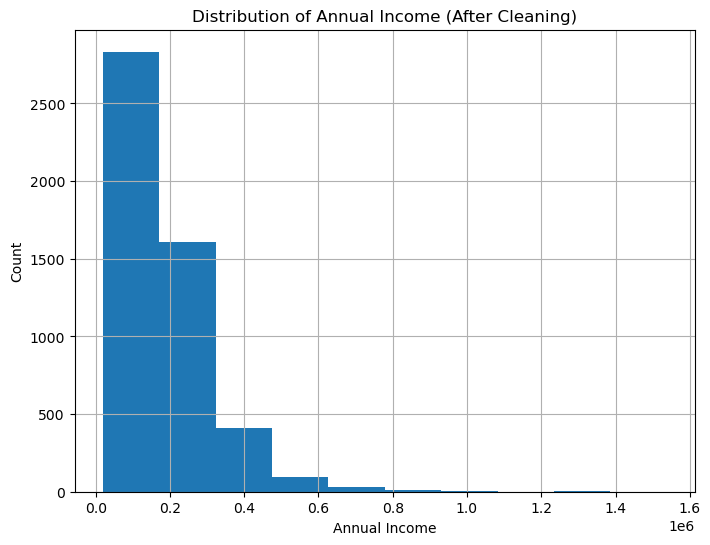

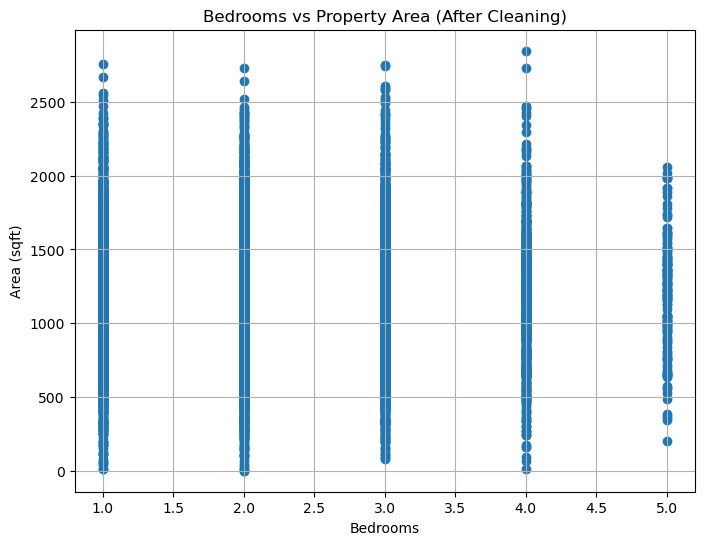

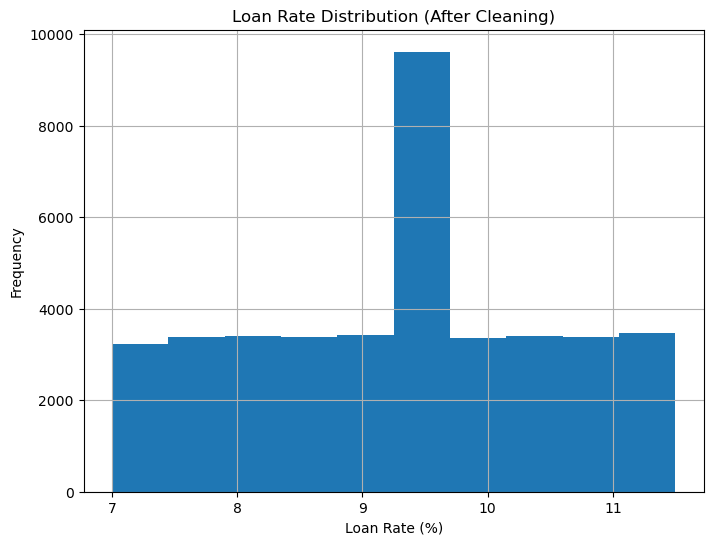

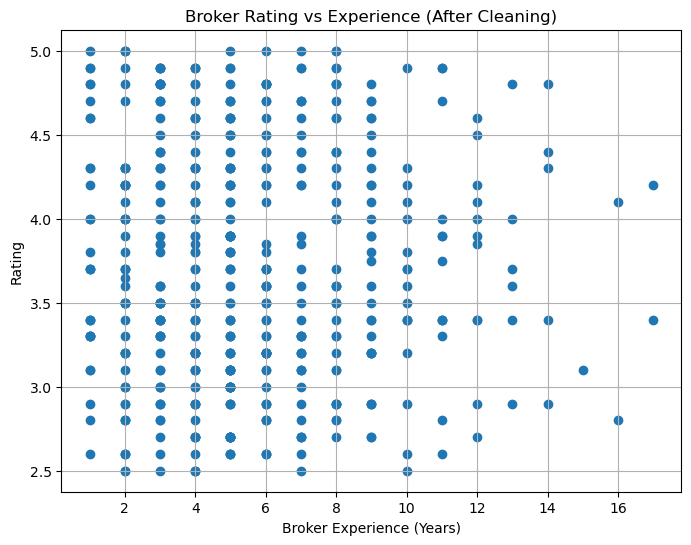

[--- Step 5 Visualizations Complete ---]


In [185]:
import matplotlib.pyplot as plt

print("\n[--- Step 5: Visualization After Data Cleaning ---]")

# 1️⃣ Distribution of Annual Income (Customers)
plt.figure(figsize=(8, 6))
plt.hist(dfs_clean['Customers']['annual_income'].dropna())
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.title("Distribution of Annual Income (After Cleaning)")
plt.grid(True)
plt.show()

# 2️⃣ Property Area vs Bedrooms (Properties)
plt.figure(figsize=(8, 6))
plt.scatter(
    dfs_clean['Properties']['bedrooms'],
    dfs_clean['Properties']['area_sqft']
)
plt.xlabel("Bedrooms")
plt.ylabel("Area (sqft)")
plt.title("Bedrooms vs Property Area (After Cleaning)")
plt.grid(True)
plt.show()

# 3️⃣ Loan Rate Distribution (Deals)
plt.figure(figsize=(8, 6))
plt.hist(dfs_clean['Deals']['loan_rate'].dropna())
plt.xlabel("Loan Rate (%)")
plt.ylabel("Frequency")
plt.title("Loan Rate Distribution (After Cleaning)")
plt.grid(True)
plt.show()

# 4️⃣ Broker Rating vs Experience (Brokers)
plt.figure(figsize=(8, 6))
plt.scatter(
    dfs_clean['Brokers']['experience_years'],
    dfs_clean['Brokers']['rating']
)
plt.xlabel("Broker Experience (Years)")
plt.ylabel("Rating")
plt.title("Broker Rating vs Experience (After Cleaning)")
plt.grid(True)
plt.show()

print("[--- Step 5 Visualizations Complete ---]")


# STEP 6 — DATA INTEGRATION

In [182]:
print("\n[--- Starting Step 6: Data Integration ---]")

# Merge Properties and PropertyDetails into a dimension table
df_props = dfs_clean['Properties']
df_prop_details = dfs_clean['PropertyDetails']
dim_properties = pd.merge(df_props, df_prop_details, on='property_id', how='inner')
print(f"  > Combined 'Properties' and 'PropertyDetails' into 'dim_properties'.")

# Remove orphan deals that do not match any customer/broker/property
fact_deals = dfs_clean['Deals'].copy()
rows_before = len(fact_deals)
dim_customers = dfs_clean['Customers']
dim_brokers = dfs_clean['Brokers']

valid_customer_ids = set(dim_customers['customer_id'])
valid_broker_ids = set(dim_brokers['broker_id'])
valid_property_ids = set(dim_properties['property_id'])

fact_deals = fact_deals[fact_deals['customer_id'].isin(valid_customer_ids)]
fact_deals = fact_deals[fact_deals['broker_id'].isin(valid_broker_ids)]
fact_deals = fact_deals[fact_deals['property_id'].isin(valid_property_ids)]
print(f"  > Resolved orphan keys. Dropped {rows_before - len(fact_deals)} orphan deals.")

# Build the unified master table joining customers, brokers, properties, and deals
df_master = pd.merge(fact_deals, dim_customers, on='customer_id', how='inner', suffixes=('', '_cust'))
df_master = pd.merge(df_master, dim_brokers, on='broker_id', how='inner', suffixes=('', '_brk'))
df_master = pd.merge(df_master, dim_properties, on='property_id', how='inner', suffixes=('', '_prop'))
print(f"  > Created 'df_master' with {len(df_master)} rows.")
print("[--- Step 6 Complete ---]")



[--- Starting Step 6: Data Integration ---]
  > Combined 'Properties' and 'PropertyDetails' into 'dim_properties'.
  > Resolved orphan keys. Dropped 0 orphan deals.
  > Created 'df_master' with 40000 rows.
[--- Step 6 Complete ---]


## STEP 7 — DATA Transformation

In [181]:
print("\n[--- Starting Step 7: Data Transformation ---]")
df_transformed = df_master.copy()

# Create derived fields for pricing analysis
df_transformed['price_per_sqft'] = df_transformed['final_price'] / df_transformed['area_sqft']
df_transformed['property_age_at_deal'] = df_transformed['deal_date'].dt.year - df_transformed['year_built']
df_transformed['property_age_at_deal'] = df_transformed['property_age_at_deal'].apply(lambda x: 0 if x < 0 else x)
print("  > Created 'price_per_sqft' and 'property_age_at_deal'.")

# Compute success rate for each broker
broker_total_deals = df_transformed['broker_id'].value_counts()
broker_closed_deals = df_transformed[df_transformed['status'] == 'Closed']['broker_id'].value_counts()
broker_success_rate = (broker_closed_deals / broker_total_deals) * 100
broker_success_rate = broker_success_rate.fillna(0)
df_transformed['broker_success_rate'] = df_transformed['broker_id'].map(broker_success_rate)
print("  > Created 'broker_success_rate'.")

# Bin income and price into quantile groups
df_transformed['income_bin'] = pd.qcut(df_transformed['annual_income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'], duplicates='drop')
df_transformed['price_bin'] = pd.qcut(df_transformed['final_price'].dropna(), q=4, labels=['Budget', 'Standard', 'Premium', 'Luxury'], duplicates='drop')
print("  > Binned 'annual_income' and 'final_price'.")

# Group lead sources into Online / Offline / Referral
lead_source_map = {'Google Ads': 'Online', 'Website': 'Online', 'Social Media': 'Online', 'Billboard': 'Offline', 'Newspaper': 'Offline', 'Walk-in': 'Offline', 'Cold Call': 'Offline', 'Referral': 'Referral', 'Broker Referral': 'Referral'}
df_transformed['lead_source_grouped'] = df_transformed['lead_source'].map(lead_source_map).fillna('Other')
print("  > Grouped 'lead_source'.")

# Create boolean amenity flags (has_pool, has_gym, etc.)
key_amenities = ['Pool', 'Gym', 'Wifi', 'Parking', 'Lift', 'Security', 'Garden', 'Club House', 'Play Area']
for amenity in key_amenities:
    col_name = f'has_{amenity.lower().replace(" ", "_")}'
    df_transformed[col_name] = df_transformed['amenities'].str.contains(amenity, na=False, case=False)
print("  > Created amenity flags.")

# Apply one-hot encoding on categorical fields
ohe_cols = ['property_type', 'segment', 'condition']
df_dummies = pd.get_dummies(df_transformed[ohe_cols], prefix_sep='_', drop_first=True)
df_transformed = pd.concat([df_transformed, df_dummies], axis=1)
print("  > One-Hot Encoded categorical features.")
print("[--- Step 7 Complete ---]")



[--- Starting Step 7: Data Transformation ---]
  > Created 'price_per_sqft' and 'property_age_at_deal'.
  > Created 'broker_success_rate'.
  > Binned 'annual_income' and 'final_price'.
  > Grouped 'lead_source'.
  > Created amenity flags.
  > One-Hot Encoded categorical features.
[--- Step 7 Complete ---]


In [184]:
df_master.head()

,deal_id,deal_date,customer_id,broker_id,property_id,offer_price,final_price,mortgage,loan_rate,status,...,listing_price,status_prop,area_sqft_is_outlier,amenities,age_years,condition,hoa_fee,energy_rating,school_score,walk_score
0,DEAL300000,2022-07-10,CUST103914,BRK50481,PROP202034,3931599,4196995.0,Yes,10.59,Pending,...,4169148,Active,False,"Power Backup, Play Area",30.0,Needs Renovation,3233.0,F,79.0,63.0
1,DEAL300001,2023-11-19,CUST102593,BRK50184,PROP200094,11631261,11190474.0,Yes,9.60,Closed,...,12440134,Withdrawn,False,"Gym, Garden",18.0,New,1937.0,D,81.0,58.0
2,DEAL300002,2023-02-01,CUST102931,BRK50215,PROP203518,6842931,6762374.0,Yes,10.84,Closed,...,7010839,Under Offer,False,"Security, Lift",13.0,Needs Renovation,1427.0,B,55.0,42.0
3,DEAL300003,2020-08-01,CUST100630,BRK50338,PROP205572,12499576,12126444.0,Yes,10.32,Pending,...,13763841,Active,False,"Club House, Garden, Gym, Intercom, Power Backup",28.0,Good,3388.0,A,60.0,30.0
4,DEAL300004,2023-03-28,CUST101138,BRK50299,PROP207772,6100539,6206329.0,Yes,9.52,Pending,...,6058719,Active,False,"Power Backup, Gym, Wifi, Club House",7.0,Old,2031.0,F,93.0,50.0


# Step 8: Data Validation

In [ ]:
print("\n[--- Step 8: Data Validation ---]")

modeling_features = [
    'area_sqft', 'bedrooms', 'bathrooms', 'property_age_at_deal', 
    'experience_years', 'rating', 'hoa_fee', 'school_score', 'walk_score',
    'broker_success_rate'
]

available_features = [col for col in modeling_features if col in df_transformed.columns]
feature_nan_counts = df_transformed[available_features].isnull().sum()
feature_total_nans = feature_nan_counts.sum()

assert feature_total_nans == 0, (
    f"Validation FAILED: Found {feature_total_nans} NaNs in FEATURES.\n"
    f"{feature_nan_counts[feature_nan_counts > 0]}"
)
print("  > PASSED: No missing values found in key modeling features.")

closed_deals = df_transformed[df_transformed['status'] == 'Closed']
nan_in_closed_price = closed_deals['final_price'].isnull().sum()

assert nan_in_closed_price == 0, (
    f"Validation FAILED: Found {nan_in_closed_price} 'Closed' deals with a NaN 'final_price'."
)
print("  > PASSED: No missing 'final_price' values found for 'Closed' deals.")

if 'close_date' in df_transformed.columns:
    date_check_df = df_transformed[['deal_date', 'close_date']].dropna()
    invalid_dates = (date_check_df['close_date'] < date_check_df['deal_date']).sum()
    assert invalid_dates == 0, (
        f"Validation FAILED: Found {invalid_dates} rows where 'close_date' is before 'deal_date'."
    )
    print("  > PASSED: 'close_date' is always on or after 'deal_date'.")

invalid_price = (df_transformed['final_price'].dropna() <= 0).sum()
assert invalid_price == 0, (
    f"Validation FAILED: Found {invalid_price} rows with non-positive 'final_price'."
)
print("  > PASSED: All 'final_price' values are positive.")

invalid_area = (df_transformed['area_sqft'] <= 0).sum()
assert invalid_area == 0, (
    f"Validation FAILED: Found {invalid_area} rows with non-positive 'area_sqft'."
)
print("  > PASSED: All 'area_sqft' values are positive.")

assert df_transformed['deal_id'].is_unique, (
    "Validation FAILED: 'deal_id' is not unique in the master table."
)
print("  > PASSED: 'deal_id' is unique.")

print("\n--- -------------------------------------- ---")
print("--- ALL VALIDATION CHECKS PASSED ---")
print("--- The 'df_transformed' DataFrame is clean, logical, and ready for modeling. ---")
print("--- -------------------------------------- ---\n")


In [ ]:
print("--- Visualizing area_sqft Cleaning (Before vs. After) ---")

# 'Before' data from the raw loaded tables
before_area = pd.to_numeric(dataframes['Properties']['area_sqft'], errors='coerce')

# 'After' data from our final clean table
after_area = df_transformed['area_sqft']

# Create two plots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Before
sns.histplot(before_area, bins=50, ax=ax1, kde=True)
ax1.set_title('BEFORE Cleaning (Note the 0s and negatives)', fontsize=16)
ax1.set_xlabel('Area (sqft)')
ax1.set_ylabel('Frequency')
# Focus on the problematic area
ax1.set_xlim(-500, 3000) 

# After
sns.histplot(after_area, bins=50, ax=ax2, kde=True)
ax2.set_title('AFTER Imputation', fontsize=16)
ax2.set_xlabel('Area (sqft)')
ax2.set_ylabel('Frequency')
ax2.set_xlim(-500, 3000)

plt.suptitle('area_sqft Imputation Results', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

In [ ]:
print("--- Visualizing Orphan Key Removal ---")

# We need to re-calculate these numbers from the script
original_deals_count = len(dfs_clean['Deals'])
final_deals_count = len(df_master) # or df_transformed

counts = {
    'Original Deals': original_deals_count,
    'Deals After Removing Orphans': final_deals_count
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.title('Effect of Resolving Orphan Keys', fontsize=16)
plt.ylabel('Number of Rows in Deals Table')
plt.show()

print(f"We dropped {original_deals_count - final_deals_count} deals that were orphans.")

In [ ]:
print("--- Visualizing New Features from Step 7 ---")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# 1. Histogram of 'price_per_sqft'
sns.histplot(df_transformed['price_per_sqft'].dropna(), kde=True, ax=ax1)
ax1.set_title('Distribution of price_per_sqft', fontsize=14)

# 2. Histogram of 'broker_success_rate'
sns.histplot(df_transformed['broker_success_rate'], kde=True, ax=ax2)
ax2.set_title('Distribution of broker_success_rate', fontsize=14)

# 3. Bar chart of new 'income_bin'
sns.countplot(x='income_bin', data=df_transformed, order=['Low', 'Medium', 'High', 'Very High'], ax=ax3)
ax3.set_title('Distribution of new income_bin', fontsize=14)

plt.suptitle('Visualization of Engineered Features', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

# Step 9: Documentation & Data Dictionary


In [ ]:
print("--- Starting Step 9: Documentation & Data Dictionary ---")

if 'df_transformed' not in locals():
    print("Error: 'df_transformed' DataFrame not found. Please run the full pipeline (Steps 5-8) first.")
else:
    print("Creating new Data Dictionary for 'df_transformed'...")
    
    final_cols_df = pd.DataFrame({
        'column_name': df_transformed.columns,
        'data_type': df_transformed.dtypes.astype(str)
    }).reset_index(drop=True)

    descriptions = {
        'deal_id': 'Unique identifier for each deal.',
        'deal_date': 'Date the deal was initiated (datetime).',
        'customer_id': 'Unique identifier for the customer.',
        'broker_id': 'Unique identifier for the broker.',
        'property_id': 'Unique identifier for the property.',
        'offer_price': 'The initial offer price for the deal.',
        'final_price': 'The final closing price (imputed for Closed deals, NaN for others).',
        'mortgage': 'Whether the deal involved a mortgage (Yes/No).',
        'loan_rate': 'Loan interest rate (imputed with median, -1s removed).',
        'status': 'Current status of the deal (e.g., Closed, Pending, Cancelled).',
        'close_date': 'Date the deal was closed (datetime, NaN if not closed).',
        'channel': 'Original channel of the deal (e.g., Walk-in, Email Campaign).',
        'lead_source': 'Original source of the lead (e.g., Google Ads, Newspaper).',
        'notes_freeform': 'Cleaned freeform notes (e.g., "urgent").',
        'price_band': 'Original price band category (e.g., High, Mid, Low).',
        
        'email': 'Customer email (invalid formats set to NaN).',
        'phone': 'Customer phone number (raw).',
        'city_cust': 'Standardized city of the customer.',
        'annual_income': 'Customer annual income (imputed with segment median).',
        'segment': 'Customer segment (e.g., Luxury, Premium).',
        'first_name_cust': 'First name of the customer.',
        'last_name_cust': 'Last name of the customer.',
        'annual_income_is_outlier': 'Flag (True/False) if income is an outlier.',
        
        'agency': 'Brokerage agency name.',
        'experience_years': 'Broker years of experience (imputed with agency median).',
        'rating': 'Broker rating (imputed with agency median).',
        'city_brk': 'Standardized city of the broker.',
        'first_name_brk': 'First name of the broker.',
        'last_name_brk': 'Last name of the broker.',

        'city_prop': 'Standardized city of the property.',
        'neighborhood': 'Neighborhood of the property.',
        'property_type': 'Type of property (e.g., Apartment, Villa).',
        'bedrooms': 'Number of bedrooms (imputed with property_type median).',
        'bathrooms': 'Number of bathrooms (imputed with property_type median).',
        'area_sqft': 'Area in square feet (0, negatives, and NaNs imputed with property_type median).',
        'year_built': 'Year the property was built (imputed with property_type median).',
        'parking': 'Type of parking (e.g., Yes, No, Covered).',
        'furnishing': 'Furnishing status (e.g., Furnished, Unfurnished).',
        'latitude': 'Latitude coordinate.',
        'longitude': 'Longitude coordinate.',
        'listing_price': 'Original listing price of the property.',
        'status_prop': 'Status of the property listing (e.g., Sold, Active).',
        'area_sqft_is_outlier': 'Flag (True/False) if area_sqft is an outlier.',
        'amenities': 'Original comma-separated list of amenities.',
        'age_years': 'Original age of the property (static).',
        'condition': 'Condition of the property (e.g., New, Old).',
        'hoa_fee': 'Homeowners Association fee (imputed with condition median).',
        'energy_rating': 'Energy rating (A-F).',
        'school_score': 'Nearby school score (imputed with condition median).',
        'walk_score': 'Walkability score (imputed with condition median).',
        
        'price_per_sqft': 'Derived: final_price / area_sqft. (NaN if final_price is NaN)',
        'property_age_at_deal': 'Derived: Year of deal_date - year_built.',
        'broker_success_rate': 'Derived: (Total Closed Deals / Total Deals) for each broker.',
        'income_bin': 'Binned: annual_income in 4 quartiles (Low, Medium, High, Very High).',
        'price_bin': 'Binned: final_price in 4 quartiles (Budget, Standard, Premium, Luxury).',
        'lead_source_grouped': 'Grouped: lead_source mapped to Online, Offline, Referral, Other.',
        
        'has_pool': 'Amenity Flag: 1 if "Pool" in amenities, 0 otherwise.',
        'has_gym': 'Amenity Flag: 1 if "Gym" in amenities, 0 otherwise.',
        'has_wifi': 'Amenity Flag: 1 if "Wifi" in amenities, 0 otherwise.',
        'has_parking': 'Amenity Flag: 1 if "Parking" in amenities, 0 otherwise.',
        'has_lift': 'Amenity Flag: 1 if "Lift" in amenities, 0 otherwise.',
        'has_security': 'Amenity Flag: 1 if "Security" in amenities, 0 otherwise.',
        'has_garden': 'Amenity Flag: 1 if "Garden" in amenities, 0 otherwise.',
        'has_club_house': 'Amenity Flag: 1 if "Club House" in amenities, 0 otherwise.',
        'has_play_area': 'Amenity Flag: 1 if "Play Area" in amenities, 0 otherwise.',

        'property_type_Farm House': 'OHE: 1 if property_type is Farm House, 0 otherwise.',
        'property_type_Plot': 'OHE: 1 if property_type is Plot, 0 otherwise.',
        'property_type_Row House': 'OHE: 1 if property_type is Row House, 0 otherwise.',
        'property_type_Studio': 'OHE: 1 if property_type is Studio, 0 otherwise.',
        'property_type_Villa': 'OHE: 1 if property_type is Villa, 0 otherwise.',
        'segment_Luxury': 'OHE: 1 if segment is Luxury, 0 otherwise.',
        'segment_Mid': 'OHE: 1 if segment is Mid, 0 otherwise.',
        'segment_Premium': 'OHE: 1 if segment is Premium, 0 otherwise.',
        'condition_Good': 'OHE: 1 if condition is Good, 0 otherwise.',
        'condition_Needs Renovation': 'OHE: 1 if condition is Needs Renovation, 0 otherwise.',
        'condition_Old': 'OHE: 1 if condition is Old, 0 otherwise.'
    }
    
    final_cols_df['description'] = final_cols_df['column_name'].map(descriptions)
    final_cols_df['description'] = final_cols_df['description'].fillna('N/A - No description provided.')

    output_filename = 'RealEstate_DataDictionary_FINAL.csv'
    final_cols_df.to_csv(output_filename, index=False)
    
    print(f"\nSuccessfully created and saved '{output_filename}'.")
    print("\n--- New Data Dictionary Preview (first 10 rows) ---")
    print(final_cols_df.head(10).to_string())


#  Profiling Summary (Before Cleaning)

A high-level profiling analysis was performed on all five source tables:
**Customers**, **Brokers**, **Properties**, **PropertyDetails**, and **Deals**.
The following issues were identified prior to cleaning and transformation:

---

## **➤ Missing Values**

* **Customers:** `email`, `annual_income` had missing entries.
* **Properties:** `area_sqft`, `bedrooms`, `bathrooms`, `year_built` contained missing values.
* **PropertyDetails:** `hoa_fee`, `school_score`, `walk_score` had significant null values.
* **Deals:** `final_price` missing for all non-closed deals (expected).

---

## **➤ Duplicate Records**

* Duplicate entries found for `customer_id` in Customers.
* No major duplicates identified in Properties, Brokers, or Deals.

---

## **➤ Invalid / Inconsistent Values**

* Misspelled city names (e.g., **Surrat**, **Chennnai**, **Dehli**, **Mumbay**).
* Invalid email formats in Customers.
* Zero or negative values in:

  * `area_sqft`
  * `loan_rate`
  * `bedrooms`
  * `bathrooms`
* Inconsistent formatting in:

  * `mortgage`
  * `condition`
  * `notes_freeform`
  * `lead_source`

---

## **➤ Outliers**

* Extremely large values in `annual_income`.
* Abnormally small property areas (< **100 sqft**).
* High-end, unrealistic `final_price` values in Deals.

---

## **➤ Structural Problems**

* `deal_date` and `close_date` stored as plain text instead of datetime.
* Customer and broker names stored as combined text (required splitting).
* Amenities stored as raw comma-separated strings (needed multi-hot encoding).


# **Transformation Log: Real Estate Project**

This document summarizes the key decisions and operations performed during the data pipeline (Steps 4, 5, and 7) to create the final **`df_transformed`** analytical table.

---

## **Step 4: Schema Alignment & Standardization**

The goal was to make all raw data structurally consistent.

### **✔ Column Naming**

All column names from all sheets were converted to **snake_case**
(e.g., `customer_id`, `annual_income`, `property_id`).

### **✔ Date Normalization**

* `deal_date` and `close_date` (originally stored as strings)
  were converted to `datetime64[ns]`.

### **✔ City Canonicalization**

A mapping dictionary fixed spelling variations such as:

* `Surrat` → `Surat`
* `Chennnai` → `Chennai`
* `Dehli` → `Delhi`
* `Mumbay` → `Mumbai`

### **✔ Name Splitting**

* `full_name` (Customers) → `first_name`, `last_name`
* `broker_name` (Brokers) → `first_name`, `last_name`

### **✔ Categorical Standardization**

* Standardized text formatting to Title Case
* Replaced inconsistent placeholders (`'N/A'`, `'ok'`, `'na'`, `''`) with `NaN`
* Cleaned and normalized the `condition` and `notes_freeform` fields

---

## **Step 5: Data Cleaning**

The goal was to fix all invalid, missing, or illogical values before modeling.

### **✔ Duplicate Removal**

* Removed duplicate `customer_id` rows in Customers
  keeping only the first valid entry.

### **✔ Invalid Data Correction**

* `loan_rate = -1` → replaced with `NaN`
* Invalid emails (not matching regex) → replaced with `NaN`
* `area_sqft <= 0` → replaced with `NaN`

### **✔ Missing Data Imputation**

Using **group-wise median imputation**:

* `annual_income` → median by **segment**
* `rating`, `experience_years` → median by **agency**
* `area_sqft`, `bedrooms`, `bathrooms`, `year_built` → median by **property_type**
* `hoa_fee`, `school_score`, `walk_score` → median by **condition**
* `loan_rate` → overall column median
* `final_price` (Closed deals only) → filled with `offer_price`

### **✔ Outlier Flagging (IQR Method)**

Created new boolean columns to identify outliers for:

* `final_price`
* `area_sqft`
* `annual_income`

---

## **Step 7: Data Transformation (Feature Engineering)**

The goal was to enrich the dataset with new, high-value analytical features.

### **✔ Derived Features**

* `price_per_sqft` = `final_price / area_sqft`
* `property_age_at_deal` = `deal_date.year - year_built`
* `broker_success_rate` =
  **Closed Deals / Total Deals** for each broker

### **✔ Binning (Discretization)**

* `annual_income` → 4 bins:
  **Low, Medium, High, Very High**
* `final_price` → 4 bins:
  **Budget, Standard, Premium, Luxury**

### **✔ Grouping**

Simplified lead sources:

* Online
* Offline
* Referral
* Other

### **✔ Encoding (Multi-Hot)**

Parsed amenities text into 9 binary columns, e.g.:

* `has_pool`
* `has_gym`
* `has_wifi`
* `has_lift`
* `has_garden`
* `has_security`

### **✔ Encoding (One-Hot)**

Applied one-hot encoding to key categorical variables:

* `property_type`
* `segment`
* `condition`

Examples of generated features:

* `property_type_Villa`
* `segment_Luxury`
* `condition_Good`



#  **README-Style Pipeline Summary** 

## **1. Data Ingestion**

All source sheets from the master Excel file were loaded into individual pandas DataFrames.

---

## **2. Data Profiling**

Profiling reports were generated to identify:

* Missing values
* Duplicates
* Outliers
* Incorrect formatting
* Schema inconsistencies

---

## **3. Standardization**

* Converted all column names to **snake_case**.
* Normalized date fields (`deal_date`, `close_date`).
* Standardized categorical text values.
* Canonicalized city names across all tables.
* Split combined name fields into `first_name` and `last_name`.

---

## **4. Data Cleaning**

* Removed duplicate customers based on `customer_id`.
* Cleaned invalid `email` and `loan_rate` values.
* Corrected negative or zero numeric values.
* Imputed missing numeric fields using **group-wise medians**.
* Flagged outliers in:

  * `final_price`
  * `area_sqft`
  * `annual_income`

---

## **5. Data Integration**

Merged the following tables into a unified master dataset (`df_master`):

* **Customers**
* **Brokers**
* **Properties**
* **PropertyDetails**
* **Deals**

All orphan foreign keys were removed to ensure referential integrity.

---

## **6. Feature Engineering**

Created several new analytical features:

### **Derived Fields**

* `price_per_sqft`
* `property_age_at_deal`
* `broker_success_rate`

### **Additional Transformations**

* Binned `annual_income` and `final_price` into categories.
* Grouped lead sources into **Online, Offline, Referral, Other**.
* Generated multi-hot **amenity flags** (e.g., `has_pool`, `has_gym`).
* Applied one-hot encoding to categorical fields like `property_type`, `segment`, and `condition`.

---

## **7. Data Validation**

Ensured final dataset quality by verifying:

* No missing values in key modeling columns
* Valid date ordering (`deal_date` ≤ `close_date`)
* No negative or zero values in price/area fields
* Unique `deal_id` entries

---

## **8. Documentation**

Created essential documentation assets:

* **Complete Data Dictionary**
* **Profiling Summary**
* **Transformation Log**

---

## **9. Export**

Exported the final curated datasets as CSV files:

* `fact_deals_master.csv`
* `dim_customers.csv`
* `dim_brokers.csv`
* `dim_properties.csv`

These files serve as the primary input for:

* Machine learning models
* BI dashboard development
* Analytical reporting



# Step 10. Export, Deployment, and Handoff

In [ ]:
import os
import pandas as pd

print("--- Starting Step 10: Export, Deployment, and Handoff ---")

output_folder = 'final_dataset'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Created output directory: '{output_folder}'")

if 'df_transformed' not in locals() or 'dfs_clean' not in locals() or 'dim_properties' not in locals():
    print("\n[ERROR] Key DataFrames (df_transformed, dfs_clean, dim_properties) not found.")
    print("Please run the full pipeline (Steps 5-8) to generate the data before exporting.")

else:
    try:
        fact_table_path = os.path.join(output_folder, 'fact_deals_master.csv')
        df_transformed.to_csv(fact_table_path, index=False)
        print(f"\n[SUCCESS] Exported Fact Table to: {fact_table_path}")

        dim_cust_path = os.path.join(output_folder, 'dim_customers.csv')
        dfs_clean['Customers'].to_csv(dim_cust_path, index=False)
        print(f"[SUCCESS] Exported Customer Dimension to: {dim_cust_path}")

        dim_brk_path = os.path.join(output_folder, 'dim_brokers.csv')
        dfs_clean['Brokers'].to_csv(dim_brk_path, index=False)
        print(f"[SUCCESS] Exported Broker Dimension to: {dim_brk_path}")

        dim_prop_path = os.path.join(output_folder, 'dim_properties.csv')
        dim_properties.to_csv(dim_prop_path, index=False)
        print(f"[SUCCESS] Exported Property Dimension to: {dim_prop_path}")

        print("\n--- -------------------------------------- ---")
        print("---           EXPORT COMPLETE            ---")
        print("---   'final_dataset' folder is ready.   ---")
        print("--- -------------------------------------- ---")

    except Exception as e:
        print(f"\n[ERROR] An error occurred during file export: {e}")


In [ ]:
# !pip install google-cloud-bigquery google-cloud-storage pandas-gbq

## Uploading Final Datasets to BigQuery

In [ ]:
print("\n--- STEP 10: Uploading Final Datasets to BigQuery ---")

from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd
import os

# ---------------------------------------------
# 1. Load GCP Credentials
# ---------------------------------------------
KEY_PATH = "gcp-key.json"     # <-- your downloaded key file
PROJECT_ID = "practical-theme-455018-t5"
DATASET_ID = "real_estate_dataset"   # BigQuery dataset name

credentials = service_account.Credentials.from_service_account_file(KEY_PATH)
client = bigquery.Client(credentials=credentials, project=PROJECT_ID)

# ---------------------------------------------
# 2. Create Dataset if it does NOT exist
# ---------------------------------------------
dataset_ref = bigquery.Dataset(f"{PROJECT_ID}.{DATASET_ID}")
dataset_ref.location = "US"

try:
    client.get_dataset(dataset_ref)
    print(f"Dataset '{DATASET_ID}' already exists.")
except:
    client.create_dataset(dataset_ref)
    print(f"Created dataset '{DATASET_ID}' successfully.")

# ---------------------------------------------
# 3. Helper Function to Upload Any DataFrame
# ---------------------------------------------
def upload_table(df, table_name):
    table_id = f"{PROJECT_ID}.{DATASET_ID}.{table_name}"
    
    job_config = bigquery.LoadJobConfig(
        write_disposition="WRITE_TRUNCATE",  # replace table
        autodetect=True,                     # automatically infer schema
        source_format=bigquery.SourceFormat.CSV
    )
    
    # Upload using a temporary CSV buffer
    df.to_csv("temp.csv", index=False)
    
    with open("temp.csv", "rb") as file:
        job = client.load_table_from_file(file, table_id, job_config=job_config)
    
    job.result()  # Wait for upload to finish
    print(f"[SUCCESS] Uploaded: {table_name}")

# ---------------------------------------------
# 4. Upload All Final Tables
# ---------------------------------------------
upload_table(df_transformed, "fact_deals_master")
upload_table(dfs_clean['Customers'], "dim_customers")
upload_table(dfs_clean['Brokers'], "dim_brokers")
upload_table(dim_properties, "dim_properties")

print("\n--- ALL TABLES SUCCESSFULLY UPLOADED TO BIGQUERY ---")


# 11. Predictive Analytics

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

print("--- Step 11, Task 1: REGRESSION ANALYSIS ---")
print("Using the clean 'df_transformed' DataFrame.\n")

target = 'final_price'

numeric_features = [
    'area_sqft', 'bedrooms', 'bathrooms', 'property_age_at_deal', 
    'experience_years', 'rating', 'hoa_fee', 'school_score', 'walk_score',
    'broker_success_rate', 'annual_income', 'offer_price'
]

ohe_features = [
    col for col in df_transformed.columns if col.startswith('prop_type_') or \
                                            col.startswith('segment_') or \
                                            col.startswith('condition_')
]

features = numeric_features + ohe_features

y = df_transformed[target]
X = df_transformed[features]

valid_rows = y.notnull()
X = X[valid_rows]
y = y[valid_rows]

print(f"Removed NaNs from target. Using {len(y)} 'Closed' deals for training.")
print(f"Target (y) shape: {y.shape}")
print(f"Features (X) shape: {X.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


## Simple Linear Regression

In [179]:
print("\n--- 1. Simple Linear Regression Model (Only area_sqft) ---")

df_simple = df_transformed.dropna(subset=['area_sqft', 'final_price'])

X = df_simple[['area_sqft']]
y = df_simple['final_price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

simple_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

simple_lr.fit(X_train, y_train)

y_pred = simple_lr.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print("\n--- Simple Linear Regression Results ---")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: ₹{rmse:,.2f}")
print(f"MAPE: {mape:.2%}")
print(f"Model Accuracy: {r2 * 100:.2f}%")

sample = pd.DataFrame({'area_sqft': [1200]})
predicted_price = simple_lr.predict(sample)[0]

print(f"\nPredicted Price for 1200 sqft: ₹{predicted_price:,.2f}")



--- 1. Simple Linear Regression Model (Only area_sqft) ---

--- Simple Linear Regression Results ---
R² Score: -0.0001
RMSE: ₹3,527,309.76
MAPE: 48.61%
Model Accuracy: -0.01%

Predicted Price for 1200 sqft: ₹9,044,006.45


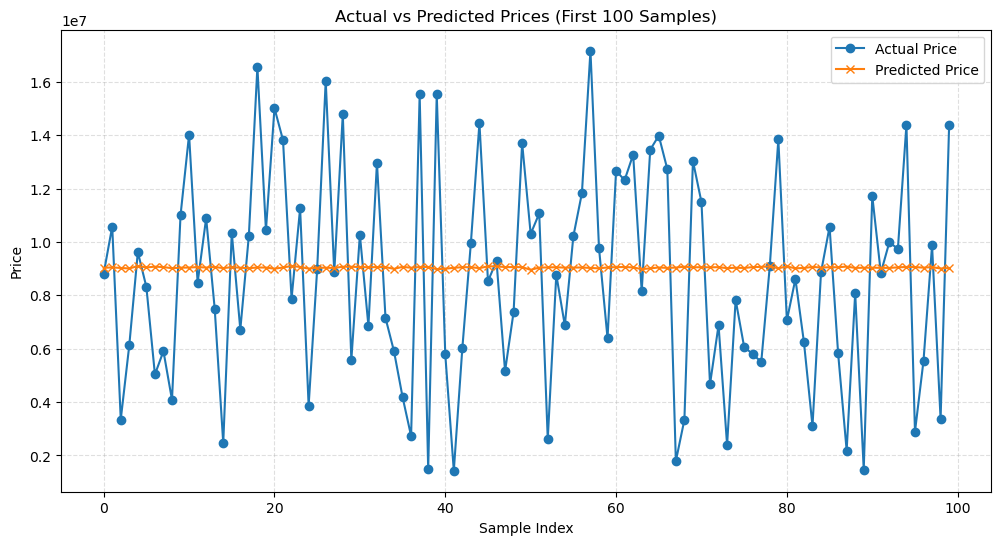

In [180]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(y_test.values[:100], label="Actual Price", marker='o')
plt.plot(y_pred[:100], label="Predicted Price", marker='x')

plt.title("Actual vs Predicted Prices (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


In [ ]:
plt.figure(figsize=(10,6))

# Scatter of actual values
plt.scatter(X_test['area_sqft'], y_test, label='Actual Price', alpha=0.5)

# Regression line
plt.scatter(X_test['area_sqft'], y_pred, color='red', label='Predicted Price', alpha=0.7)

plt.title("Simple Linear Regression: area_sqft vs Price")
plt.xlabel("Area (sqft)")
plt.ylabel("Final Price")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(X_test['area_sqft'], residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')

plt.title("Residual Plot (Simple Linear Regression)")
plt.xlabel("Area (sqft)")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


## Multiple Linear Regression

In [ ]:
print("\n---  2: Multiple Linear Regression ---")

numeric_features = [
    'area_sqft',
    'bedrooms',
    'bathrooms',
    'listing_price',
    'loan_rate',
    'annual_income',
    'property_age_at_deal'
]

df_lr = df_transformed.dropna(subset=numeric_features + ['final_price'])

X = df_lr[numeric_features]
y = df_lr['final_price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

multi_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

multi_model.fit(X_train, y_train)

y_pred_multi = multi_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

r2_multi = r2_score(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))
mape_multi = mean_absolute_percentage_error(y_test, y_pred_multi)

print("\n--- Multiple Linear Regression Results ---")
print(f"R² Score: {r2_multi:.4f}")
print(f"RMSE: ₹{rmse_multi:,.2f}")
print(f"MAPE: {mape_multi:.2%}")
print(f"Model Accuracy: {r2_multi * 100:.2f}%")


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(y_test.values[:100], label="Actual Price", marker='o')
plt.plot(y_pred_multi[:100], label="Predicted Price", marker='x')

plt.title("Actual vs Predicted Prices (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Price (₹)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_multi, alpha=0.5)

plt.title("Scatter Plot: Actual vs Predicted Prices")
plt.xlabel("Actual Price (₹)")
plt.ylabel("Predicted Price (₹)")
plt.grid(True, linestyle="--", alpha=0.5)

# Ideal line
min_val = min(y_test.min(), y_pred_multi.min())
max_val = max(y_test.max(), y_pred_multi.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')  # 45° line

plt.show()


In [ ]:
residuals = y_test - y_pred_multi

plt.figure(figsize=(10,6))
plt.scatter(y_pred_multi, residuals, alpha=0.5)

plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Price (₹)")
plt.ylabel("Residual (Error)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## Polynomial Regression (Degree 2)

In [ ]:
print("\n--- 3: Polynomial Regression (Degree 2) ---")

numeric_features = [
    'area_sqft',
    'bedrooms',
    'bathrooms',
    'listing_price',
    'loan_rate',
    'annual_income',
    'property_age_at_deal'
]

df_poly = df_transformed.dropna(subset=numeric_features + ['final_price'])
X = df_poly[numeric_features]
y = df_poly['final_price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

poly_model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly)

print("\n--- Polynomial Regression Results (Degree 2) ---")
print(f"R² Score: {r2_poly:.4f}")
print(f"RMSE: ₹{rmse_poly:,.2f}")
print(f"MAPE: {mape_poly:.2%}")
print(f"Model Accuracy: {r2_poly * 100:.2f}%")


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(y_test.values[:100], label="Actual Price", marker='o')
plt.plot(y_pred_poly[:100], label="Predicted Price (Polynomial)", marker='x')

plt.title("Polynomial Regression: Actual vs Predicted Prices (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Price (₹)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_poly, alpha=0.5)

plt.title("Polynomial Regression: Actual vs Predicted Prices")
plt.xlabel("Actual Price (₹)")
plt.ylabel("Predicted Price (₹)")
plt.grid(True, linestyle="--", alpha=0.5)

# Ideal prediction line
min_val = min(y_test.min(), y_pred_poly.min())
max_val = max(y_test.max(), y_pred_poly.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.show()


In [ ]:
residuals_poly = y_test - y_pred_poly

plt.figure(figsize=(10,6))
plt.scatter(y_pred_poly, residuals_poly, alpha=0.5)

plt.axhline(0, color='red', linestyle='--')
plt.title("Polynomial Regression: Residual Plot")
plt.xlabel("Predicted Price (₹)")
plt.ylabel("Residuals (Error)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
plt.hist(residuals_poly, bins=40, color='skyblue', edgecolor='black')

plt.title("Polynomial Regression: Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


# REGRESSION MODEL COMPARISON

In [ ]:
print("\n\n--- FINAL REGRESSION MODEL COMPARISON ---")

# Create summary comparison table
results = pd.DataFrame({
    'Model': [
        'Simple Linear (Area Only)',
        'Multiple Linear Regression',
        'Polynomial Regression (Degree 2)'
    ],
    'R-squared (R²)': [r2_simple, r2_multi, r2_poly],
    'RMSE (Avg. Error)': [rmse_simple, rmse_multi, rmse_poly],
    'MAPE (Avg. % Error)': [mape_simple, mape_multi, mape_poly],
    'Accuracy (1 - MAPE)': [1 - mape_simple, 1 - mape_multi, 1 - mape_poly]
})

# Formatting numbers for clean output
results['R-squared (R²)'] = results['R-squared (R²)'].map('{:.4f}'.format)
results['RMSE (Avg. Error)'] = results['RMSE (Avg. Error)'].map('₹{:,.2f}'.format)
results['MAPE (Avg. % Error)'] = results['MAPE (Avg. % Error)'].map('{:.2%}'.format)
results['Accuracy (1 - MAPE)'] = results['Accuracy (1 - MAPE)'].map('{:.2%}'.format)

# Display final table
print(results.to_string(index=False))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ["Simple Linear", "Multiple Linear", "Polynomial (Deg 2)"]

r2_vals = [r2_simple, r2_multi, r2_poly]
rmse_vals = [rmse_simple, rmse_multi, rmse_poly]
acc_vals = [(1 - mape_simple), (1 - mape_multi), (1 - mape_poly)]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=r2_vals)
plt.title("R² Score Comparison of Regression Models")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=rmse_vals)
plt.title("RMSE Comparison of Regression Models")
plt.ylabel("RMSE (Error)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=acc_vals)
plt.title("Accuracy Comparison of Regression Models")
plt.ylabel("Accuracy (1 - MAPE)")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


# Random Forest 

In [ ]:
print("\n--- Extracting DataFrames From dataframes{} Dictionary ---")

df_customers = dataframes["Customers"]
df_brokers = dataframes["Brokers"]
df_properties = dataframes["Properties"]
df_property_details = dataframes["PropertyDetails"]
df_deals = dataframes["Deals"]

print("All DataFrames extracted successfully!")


In [ ]:
print("\n--- Creating df_merged (Joining All Tables) ---")

df_merged = (
    df_deals
    .merge(df_customers, on='customer_id', how='left')
    .merge(df_brokers, on='broker_id', how='left')
    .merge(df_properties, on='property_id', how='left')
)

df_merged = df_merged.merge(df_property_details, on='property_id', how='left')

print("df_merged created successfully:", df_merged.shape)


In [ ]:
print("\n--- Random Forest (Optimized Fast Version) ---")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = df_merged.copy()

df['property_age'] = df['deal_date'].dt.year - df['year_built']
df['property_age'] = df['property_age'].clip(lower=0)

df['price_per_sqft'] = df['final_price'] / df['area_sqft']
df['mortgage'] = df['mortgage'].map({'Yes': 1, 'No': 0})

df['annual_income'] = df['annual_income'].fillna(df['annual_income'].median())
df['school_score'] = df['school_score'].fillna(df['school_score'].median())
df['walk_score'] = df['walk_score'].fillna(df['walk_score'].median())

small_cat_cols = ['status', 'channel', 'lead_source', 'property_type']
df = pd.get_dummies(df, columns=[c for c in small_cat_cols if c in df.columns], drop_first=True)

df = df.dropna(subset=['final_price'])

numeric_df = df.select_dtypes(include=['int64', 'float64', 'uint8'])

y = numeric_df['final_price']
X = numeric_df.drop(columns=['final_price'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(
    n_estimators=120,
    max_depth=15,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- FINAL Random Forest Results ---")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: ₹{rmse:,.2f}")
print(f"Model Accuracy: {r2 * 100:.2f}%")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="blue", s=25)

# Perfect prediction reference line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linewidth=2,
    label="Perfect Prediction"
)

plt.title("Actual vs Predicted Final Prices (Random Forest)", fontsize=14)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values[:100], label="Actual Price", marker='o')
plt.plot(y_pred[:100], label="Predicted Price", marker='x')

plt.title("Random Forest: Actual vs Predicted Prices (First 100 Samples)", fontsize=14)
plt.xlabel("Sample Index")
plt.ylabel("Price (₹)")
plt.legend()
plt.grid(alpha=0.4)
plt.show()


In [ ]:
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, color='blue')

plt.title("Random Forest Residual Error Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


In [ ]:
tree_depths = [estimator.tree_.max_depth for estimator in model.estimators_]

plt.figure(figsize=(8, 6))
plt.hist(tree_depths, bins=20, color='green', edgecolor='black')

plt.title("Distribution of Tree Depths in Random Forest", fontsize=14)
plt.xlabel("Tree Depth")
plt.ylabel("Number of Trees")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


### 11.4 – Association Rule Mining (Amenities → Price Band / Segment)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

df_amen = df_transformed['amenities'].astype(str).str.get_dummies(sep=',').astype(int)

cos_sim = pd.DataFrame(cosine_similarity(df_amen.T), 
                       index=df_amen.columns, 

In [ ]:
                       columns=df_amen.columns)

# Show top related amenities
top_related = cos_sim.stack().sort_values(ascending=False)

print("\n--- Top Amenity Relationships (Cosine Similarity) ---")
print(top_related[top_related < 0.999].head(20))


--- Top Amenity Relationships (Cosine Similarity) ---
Gym           Pool            0.209214
Pool          Gym             0.209214
Garden        Pool            0.205772
Pool          Garden          0.205772
Parking       Garden          0.198537
Garden        Parking         0.198537
Gym           Intercom        0.198055
Intercom      Gym             0.198055
Security      Gym             0.195770
Gym           Security        0.195770
Pool          Power Backup    0.195040
Power Backup  Pool            0.195040
              Intercom        0.194433
Intercom      Power Backup    0.194433
CCTV          Pool            0.193978
Pool          CCTV            0.193978
Parking       Intercom        0.193220
Intercom      Parking         0.193220
Gym           Garden          0.192636
Garden        Gym             0.192636
dtype: float64


# Classification

## Decision Tree Classification


--- DECISION TREE CLASSIFICATION MODEL ---
Rows used: 31984

Accuracy: 81.45 %

Classification Report:

              precision    recall  f1-score   support

   Cancelled       0.05      0.00      0.00      1465
      Closed       0.82      1.00      0.90      6531

    accuracy                           0.81      7996
   macro avg       0.43      0.50      0.45      7996
weighted avg       0.68      0.81      0.73      7996



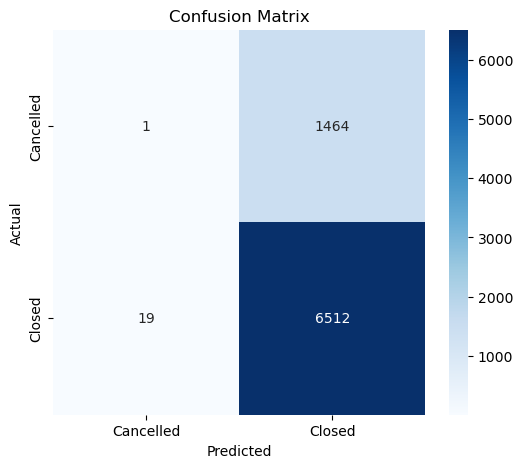

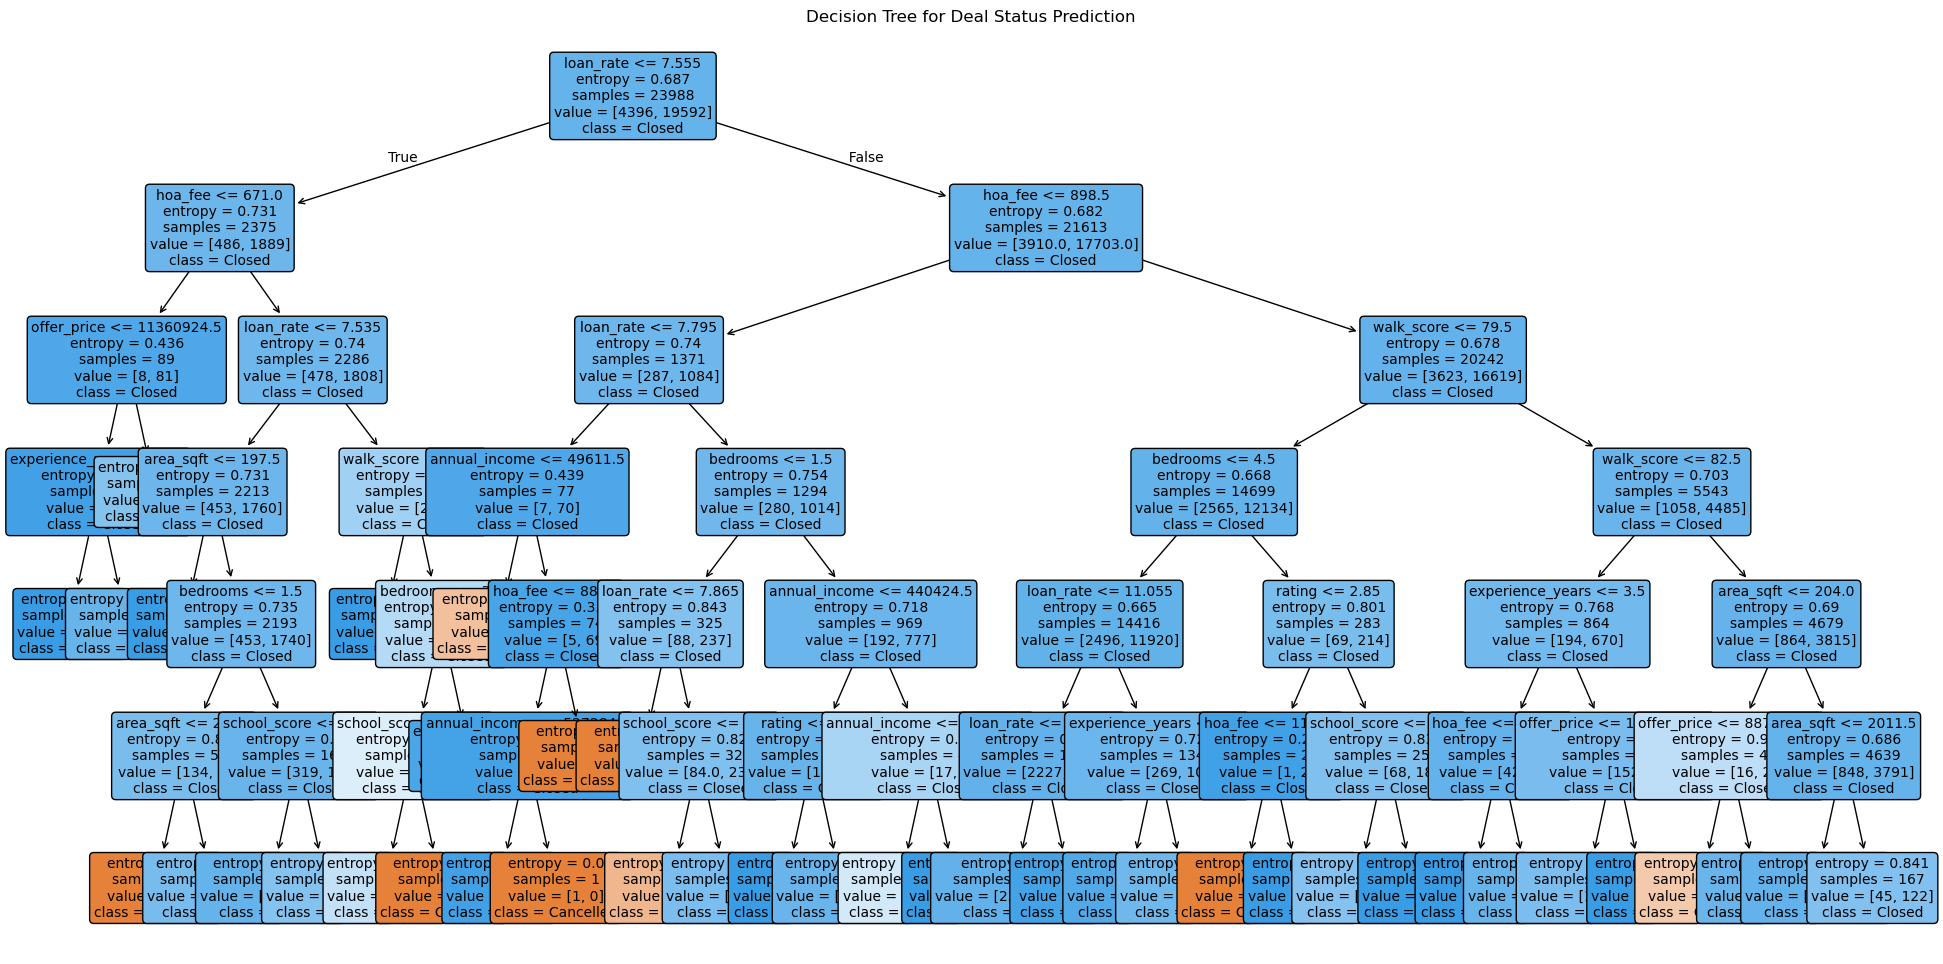

In [178]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- DECISION TREE CLASSIFICATION MODEL ---")

df = df_transformed.copy()
valid_status = ["Closed", "Cancelled"]
df = df[df["status"].isin(valid_status)].copy()

print("Rows used:", len(df))

y = df["status"]

features = [
    'area_sqft',
    'bedrooms',
    'bathrooms',
    'annual_income',
    'experience_years',
    'rating',
    'hoa_fee',
    'school_score',
    'walk_score',
    'offer_price',
    'loan_rate'
]

df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df_model = df.dropna(subset=features + ['status'])
X = df_model[features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=6,
    min_samples_split=20,
    random_state=42
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nAccuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_,
            yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(24, 12))
plot_tree(
    clf,
    feature_names=features,
    class_names=clf.classes_,
    fontsize=10,
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Deal Status Prediction")
plt.show()


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

print("\n--- Logistic Regression Classification ---")

df = df_transformed.copy()
df = df[df["status"].isin(["Closed", "Cancelled"])]

features = [
    'area_sqft','bedrooms','bathrooms','annual_income',
    'experience_years','rating','hoa_fee','school_score',
    'walk_score','offer_price','loan_rate'
]

df_model = df.dropna(subset=features + ['status'])
X = df_model[features]
y = df_model['status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)

y_pred = log_clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("\n--- Random Forest Classification ---")

rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print("\n--- KNN Classification ---")

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


## Classification Model Comparison

In [ ]:
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "KNN"],
    "Accuracy": [
        accuracy_score(y_test, log_clf.predict(X_test)),
        accuracy_score(y_test, clf.predict(X_test)),
        accuracy_score(y_test, rf_clf.predict(X_test)),
        accuracy_score(y_test, knn_clf.predict(X_test))
    ]
}

results_df = pd.DataFrame(results)
print("\n--- Classification Model Comparison ---")
print(results_df)


Logistic Regression and Random Forest achieved the highest accuracy (81.67%) 
for predicting deal status (Closed vs Cancelled). 
Decision Tree performed similarly, while KNN had slightly lower performance. 
This indicates that linear and ensemble-based classifiers are more suitable for this dataset.